# Proces Decyzyjny Markowa (*Markov Devision Process*)

Procesy Decyzyjne Markowa (MDPs).  

MDP to 5-elementowa krotka $ \langle S, A, R, P, \rho_0 \rangle $, gdzie:  

- $ S $ to zbiór wszystkich możliwych stanów,  
- $ A $ to zbiór wszystkich możliwych akcji,  
- $ R : S \times A \times S \to \mathbb{R} $ to funkcja nagrody, gdzie $ r_t = R(s_t, a_t, s_{t+1}) $,  
- $ P : S \times A \to \mathcal{P}(S) $ to funkcja prawdopodobieństwa przejścia, gdzie $ P(s' \mid s, a) $ to prawdopodobieństwo przejścia do stanu $ s' $, jeśli zaczynamy w stanie $ s $ i wykonamy akcję $ a $,  
- $ \rho_0 $ to rozkład początkowego stanu.  

Nazwa *Proces Decyzyjny Markowa* odnosi się do faktu, że system spełnia **własność Markowa**: przejścia zależą wyłącznie od ostatniego stanu i akcji, a nie od wcześniejszej historii.


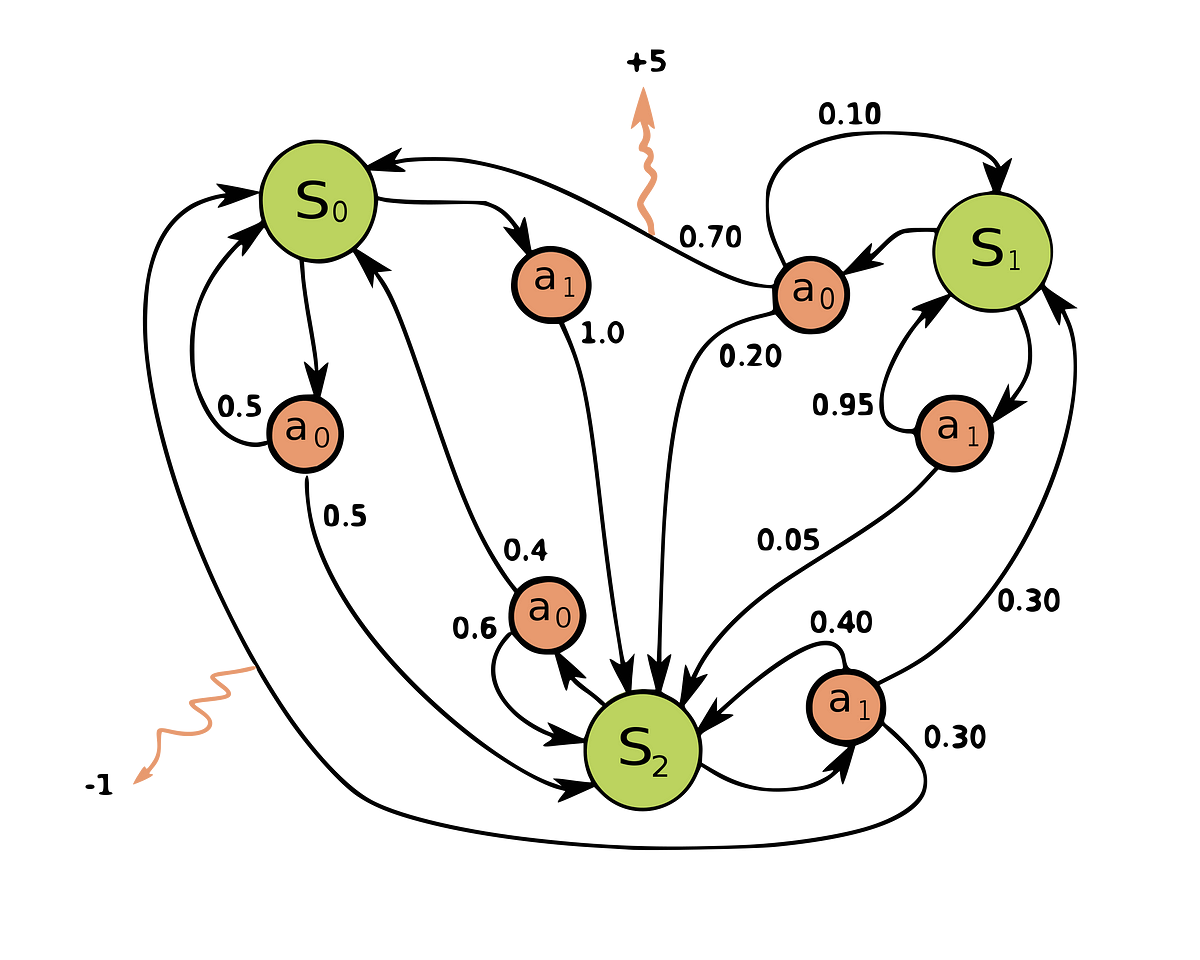

# Taksonomia metod



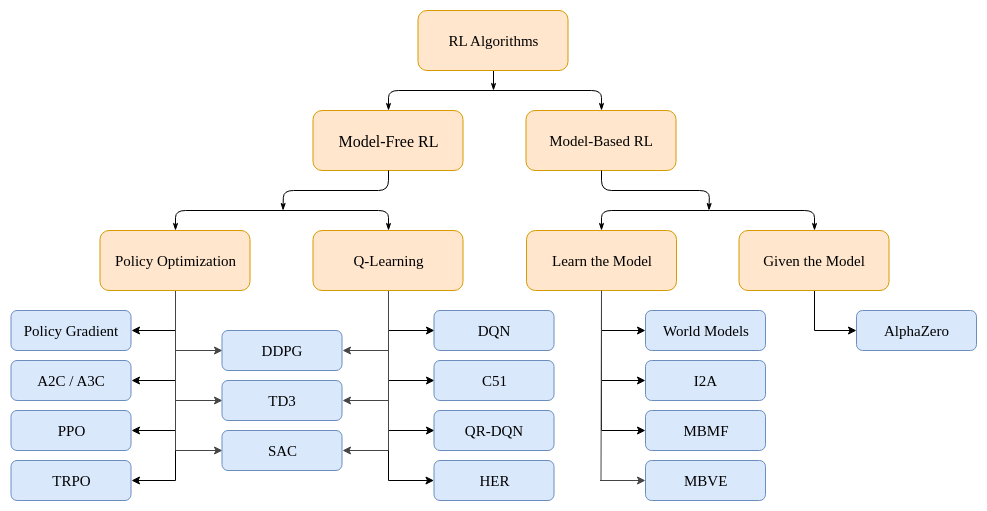

## Model-Free vs Model-Based RL

Jednym z najważniejszych punktów decyzyjnych w algorytmach uczenia przez wzmacnianie (RL) jest pytanie, czy agent ma dostęp do modelu środowiska (lub go uczy się). Przez model środowiska rozumiemy funkcję $P$, która dokonuje predykcji przejścia stanów oraz nagrody.

Główną zaletą posiadania modelu $P$ jest możliwość planowania przez agenta, co oznacza przewidywanie, co się stanie dla poszczególnych możliwych wyborów. Agenci mogą następnie destylować wyniki takiego planowania w wyuczoną strategię. Szczególnie znanym przykładem takiego podejścia jest [AlphaZero](https://arxiv.org/abs/1712.01815).

Główną wadą jest to, że agent zazwyczaj **nie ma** dostępu do rzeczywistego modelu środowiska. Jeśli agent chce korzystać z modelu w takim przypadku, musi nauczyć się go wyłącznie na podstawie doświadczenia. Nauka modelu jest trudna, więc nawet intensywny wysiłek – w tym poświęcenie dużej ilości czasu i zasobów obliczeniowych – może się nie opłacić.

Algorytmy wykorzystujące model nazywane są metodami opartymi na modelu (*model-based*), a te, które go nie używają, nazywane są metodami bezmodelowymi (*model-free*). Chociaż metody bezmodelowe rezygnują z potencjalnych korzyści w efektywności prób wynikających z użycia modelu, zazwyczaj są łatwiejsze do zaimplementowania. Na chwilę obecną (2024, brak zmiany od 2018 r.) metody bezmodelowe są bardziej popularne i były szerzej rozwijane oraz testowane niż metody oparte na modelu.

## Model-Free

Istnieją dwa główne podejścia do reprezentowania i trenowania agentów w model-free RL:  

### Optymalizacja strategii (*Policy Optimization*)  

Metody z tej rodziny jawnie reprezentują strategię jako $ \pi_{\theta}(a|s) $. Optymalizują **bezpośrednio parametry $ \theta $**, stosując optymalizację gradientową funkcji celu $ J(\pi_{\theta}) $, lub pośrednio, maksymalizując lokalne przybliżenia $ J(\pi_{\theta}) $. Ta optymalizacja jest prawie zawsze wykonywana "on-policy", co oznacza, że każda aktualizacja wykorzystuje tylko dane zebrane podczas działania zgodnie z najnowszą wersją strategii.

Optymalizacja strategii zazwyczaj obejmuje również uczenie przybliżenia $ V_{\phi}(s) $ dla on-policy funkcji wartości $ V^{\pi}(s) $, co pomaga w ustaleniu, jak zaktualizować strategię.  

Przykłady metod optymalizacji strategii to:  
- **A2C / A3C**, które stosują metody gradientowe w celu bezpośredniego maksymalizowania strategii,  
- **PPO**, które pośrednio maksymalizuje wydajność, maksymalizując funkcję celu "zastępczego" (*surrogate*), która daje konserwatywną estymację zmiany $ J(\pi_{\theta}) $ w wyniku aktualizacji.  

### Q-Learning
Metody z tej rodziny uczą przybliżenia $ Q_{\theta}(s,a) $ dla optymalnej funkcji wartości akcji $ Q^*(s,a) $. Zazwyczaj wykorzystują funkcję celu opartą na **równaniu Bellmana**. Ta optymalizacja jest prawie zawsze wykonywana off-policy, co oznacza, że każda aktualizacja może wykorzystywać dane zebrane w dowolnym momencie treningu, niezależnie od tego, jak agent eksplorował środowisko w momencie zbierania danych. Odpowiadająca strategia jest uzyskiwana poprzez związek między $ Q^* $ a $ \pi^* $: akcje podejmowane przez agenta Q-learning są dane przez  

$$ a(s) = \arg \max_a Q_{\theta}(s,a). $$  

Przykłady metod Q-learning to:  
- **DQN**, klasyk, który w dużej mierze zapoczątkował dziedzinę deep RL,  
- **C51**, wariant, który uczy rozkładu zwrotów, którego wartość oczekiwana to $ Q^* $.  

### Kompromisy między optymalizacją strategii a Q-learning
Główną zaletą metod optymalizacji stategii jest ich zasadniczość, w tym sensie, że bezpośrednio optymalizują to, co jest pożądane. To zazwyczaj czyni je stabilnymi i niezawodnymi. W przeciwieństwie do tego, metody Q-learning tylko pośrednio optymalizują wydajność agenta, trenując $ Q_{\theta} $. Jednak metody Q-learning w niektórych przypadkach zyskują przewagę dzięki znacznie większej efektywności próbkowania, ponieważ mogą bardziej efektywnie ponownie wykorzystywać dane niż techniki optymalizacji polityki.  

### Interpolacja między optymalizacją strategii a Q-learning
Co ciekawe, optymalizacja strategii i Q-learning nie są ze sobą niekompatybilne (a w pewnych okolicznościach okazują się równoważne), i istnieje wiele algorytmów, które mieszczą się pomiędzy tymi dwoma ekstremami. Algorytmy z tego spektrum mogą ostrożnie balansować między zaletami i wadami każdej ze stron. Przykłady obejmują:  
- **DDPG**, algorytm, który równocześnie uczy deterministycznej strategii i funkcji $ Q $, używając jednej do poprawiania drugiej,  
- **SAC**, wariant, który wykorzystuje stochastyczne strategii, regularizację entropii i kilka innych trików, aby ustabilizować uczenie i osiągać lepsze wyniki niż DDPG na standardowych benchmarkach.


## Podsumowanie Q-learning vs PG

| **Aspekt**                   | **Q-Learning**                                 | **Policy Gradients**       |
|-------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Główna idea**              | Uczenie funkcji wartości \( Q(s, a) \), która ocenia, jak dobra jest akcja \( a \) w stanie \( s \). | Bezpośrednie uczenie polityki \( \pi(a|s) \) poprzez optymalizację jej parametrów, aby maksymalizować nagrodę. |
| **Cel uczenia**              | Przybliżenie optymalnej funkcji wartości akcji \( Q^*(s, a) \) za pomocą równania Bellmana. | Optymalizacja parametrów polityki \( \theta \), aby maksymalizować skumulowaną nagrodę \( J(\pi_\theta) \). |
| **Reprezentacja polityki**   | Wyprowadzana pośrednio z \( Q(s, a) \) (np. \( a = \arg \max_a Q(s, a) \)). | Reprezentowana bezpośrednio jako \( \pi_\theta(a|s) \). |
| **Wykorzystanie danych**     | Off-policy: Może ponownie wykorzystywać dane zebrane przez dowolną politykę lub z przeszłych doświadczeń. | On-policy: Używa danych zebranych tylko przez aktualną politykę. |
| **Stabilność**               | Mniej stabilne; podatne na rozbieżności i błędy przeszacowania. | Bardziej stabilne i oparte na zasadniczej optymalizacji. |
| **Efektywność prób**         | Wysoka: Ponowne wykorzystanie danych sprawia, że wymaga mniej interakcji. | Niska: Potrzebuje więcej interakcji ze środowiskiem. |
| **Łatwość implementacji**    | Może być bardziej skomplikowane ze względu na aktualizacje funkcji \( Q \) i strategie eksploracji. | Łatwiejsze do zaimplementowania dzięki bezpośrednim aktualizacjom parametrów polityki. |
| **Potencjalne problemy**     | Wrażliwość na stronniczość w \( Q(s, a) \); może nie generalizować lub uczyć się nieskutecznie. | Podatność na utkwienie w słabych lokalnych optimum lub niewystarczającą eksplorację. |
| **Przykłady algorytmów**     | DQN, Double DQN, C51, DDPG (dla akcji ciągłych). | REINFORCE, A2C/A3C, PPO, SAC (dla hybrydowych podejść). |
| **Najlepiej nadaje się do**  | Zadań, gdzie kluczowa jest efektywność prób lub gdzie działa podejście oparte na wartościach. | Zadań wymagających ciągłych akcji lub zachowań stochastycznych. |
| **Przestrzeń akcji**         | Dyskretna lub ciągła (z rozszerzeniami, np. DDPG). | Dyskretna lub ciągła. Szczególnie dobrze działa z akcjami ciągłymi. |


## Model-Based

Więcej o metodach opartych na modelu można przeczytać [tutaj](https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#what-to-learn-in-model-based-rl).

# Zadanie

Dany jest model Markowskiego Procesu Decyzyjnego (MDP) z trzema stanami $( S_0, S_1, S_2 )$ i dwoma akcjami $( a_0, a_1 )$ z rysunku powyżej. Twoim zadaniem jest:

- Zaimplementowanie modelu w Pythonie.
- Symulowanie przebiegu procesu na podstawie podanych prawdopodobieństw przejść (random walk).
- Obliczenie wartości oczekiwanej nagrody z dowolnie wybranej polityki (np. losowej).


**Wskazówki**:
- Użyj słownika do reprezentowania MDP (stany, akcje, prawdopodobieństwa, nagrody).
- Zaimplementuj funkcję `simulate_process`, która pozwoli symulować działanie procesu dla losowej strategii

# Referencje

1. [Lista linków do artykułów z taksonomii](https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#what-to-learn-in-model-based-rl)
2. [SpinningUp - Kinds of RL Algorithms](https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html)